In [2]:
#imports iniciais
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('2022_LoL_esports_match_data_from_OraclesElixir.csv')
#filtrando somente os dados do CBLOL
cblol = df[df.league == 'CBLOL']

C:\Users\antph\AppData\Local\Temp\ipykernel_14716\3229948730.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2022_LoL_esports_match_data_from_OraclesElixir.csv')


# Manipulação dos dados

### Separação em tabelas usando csv.

In [21]:
jogos = cblol[['gameid','playoffs','game','patch']]
jogos = jogos.drop_duplicates(keep='first')
jogos = jogos.set_index('gameid')
jogos

,playoffs,game,patch
gameid,,,
ESPORTSTMNT01_2695708,0,1,12.01
ESPORTSTMNT01_2695774,0,1,12.01
ESPORTSTMNT01_2695807,0,1,12.01
ESPORTSTMNT01_2695835,0,1,12.01
ESPORTSTMNT01_2696159,0,1,12.01
...,...,...,...
ESPORTSTMNT04_2472121,1,2,12.14
ESPORTSTMNT04_2472122,1,3,12.14
ESPORTSTMNT04_2472249,1,1,12.14


In [24]:
novas_colunas = ['top_blue','jng_blue','mid_blue','bot_blue','sup_blue','teamid_blue','top_red','jng_red','mid_red','bot_red','sup_red','teamid_red','result']
tipos = ['str','str','str','str','str','str','str','str','str','str','str','str','int']
for col,dt in zip(novas_colunas,tipos):
    jogos[col] = np.zeros((len(jogos)),dtype = dt)

In [ ]:
for jogo,posicao,side,jogador,time,result in zip(cblol.gameid,cblol.position,cblol.side,cblol.playerid,cblol.teamid,cblol.result):
    if(posicao+'_'+side.lower() in jogos):
        jogos[posicao+'_'+side.lower()][jogo] = jogador
    jogos['teamid_'+side.lower()][jogo]=time
    if(side=='Blue' and result==1) or (side=='Red' and result==0):
        jogos['result'][jogo] = 1
    else:
        jogos['result'][jogo] = 0

In [26]:
jogos.to_csv('pre_jogo.csv')
jogos.head()

,playoffs,game,patch,top_blue,jng_blue,mid_blue,bot_blue,sup_blue,teamid_blue,top_red,jng_red,mid_red,bot_red,sup_red,teamid_red,result
gameid,,,,,,,,,,,,,,,,
ESPORTSTMNT01_2695708,0,1,12.01,oe:player:3085815ef497539cb1d93b3c9a16624,oe:player:b04655f0821a30125d72a3442647875,oe:player:ae770d2c942cee6dbcfbd1832015231,oe:player:952f90bd1805db865fdb728cd1f2d92,oe:player:c88cada1696defe81464925789aa6d8,oe:team:658a021a796aa5501503220adb38cf4,oe:player:61ea9de879a9b27bb8eddcba7f32f4a,oe:player:b23f665210a1914cab61bc8eba4c9ae,oe:player:a672b5bc1c212a6922418fad18734c1,oe:player:85c460fea615911b6075e0968b63db1,oe:player:0c041d02ab7138f57164fafbc091b2d,oe:team:40084525160457267265923de195e09,1
ESPORTSTMNT01_2695774,0,1,12.01,oe:player:609de97618e0efb1e5b4bca418e9d3c,oe:player:76cd75b6b8f0def9bc45032dcc32a61,oe:player:b57e72ed35022b11f16f095682ff782,oe:player:e740788e7e937ae3feee9222fae4415,oe:player:4e0360185eba3ff8c175aebc3278b7b,oe:team:8b76a6be17ca3ef99e562b7deb8a3ee,oe:player:6daafc30b010acda4ebc20b6785cbc0,oe:player:5913c1b5618afae9f7e2e85111ff769,oe:player:886e8205ac1b091dbf67dbae83b1544,oe:player:0cfa7da07f11bd954137ab359972515,oe:player:5dedda929608ef07aedda33aa2b474e,oe:team:5ef087125f8255546c01970122b3cec,1
ESPORTSTMNT01_2695807,0,1,12.01,oe:player:47a2fd48766f50394a3110fd124de77,oe:player:3d6241a697bf77c402bad659fb172ab,oe:player:979d7cbbe1e2a8b55d503047f5c72a0,oe:player:bead6d34dbffe42a8c5984aa0dbaeda,oe:player:70d516fd78bcce28e19f4b422bb9f02,oe:team:9dced510f02f8586ee7501922484ac0,oe:player:4a0d0414aac330b32a1a4dd6bac8743,oe:player:65d1e475734633e28d4523d92a90837,oe:player:302f32028cef9d7eeda1dbe74cf59ee,oe:player:0ce788d020173e8e2e683515c31efda,oe:player:82a42c3ebfd83735f1aaf93cf8adf7e,oe:team:bcb21457414eb9be1d27489ff7e8e59,1
ESPORTSTMNT01_2695835,0,1,12.01,oe:player:325d05dad5fd291cbb49cd50c038ce3,oe:player:931603f10a47a4241c9c2afbd69107a,oe:player:db388b1b18abbdc620de33627c0ef05,oe:player:91306951bc13eb9ddf738836c895f9a,oe:player:57cc9b210b0e3ff7b28013cec3d36ac,oe:team:92ede2510f2ad0234b1dd75f03108ae,oe:player:d61d8a0b25028f787123bfff542d305,oe:player:778c6c3733d919a3b64885912be15a9,oe:player:dda07addeb137c860725f0c964dcbbf,oe:player:1c010180887360e5d6ab967fd93693d,oe:player:54dfc311555112498c08f57e93c0270,oe:team:67169969ecc058b307edfa9c6b7a3c0,0
ESPORTSTMNT01_2696159,0,1,12.01,oe:player:63dc9ebe6cd781c9c9cecb54a6d7317,oe:player:946b74bfc34e861b344ae03700af039,oe:player:0a0e15e8e14edd7e4039cbf6f4fbfa4,oe:player:0c0d42e4a3273c1a137e83b490b8513,oe:player:e0ca016e696d77b1ee0467e5825b5ed,oe:team:84e1da9e55480128662cfdfe79cb892,oe:player:325d05dad5fd291cbb49cd50c038ce3,oe:player:931603f10a47a4241c9c2afbd69107a,oe:player:db388b1b18abbdc620de33627c0ef05,oe:player:91306951bc13eb9ddf738836c895f9a,oe:player:57cc9b210b0e3ff7b28013cec3d36ac,oe:team:92ede2510f2ad0234b1dd75f03108ae,1


In [27]:
jogadores = cblol[['playerid','playername']]
jogadores = jogadores.drop_duplicates()
jogadores = jogadores.set_index('playerid')
jogadores = jogadores.dropna()
jogadores.to_csv('jogadores.csv')
jogadores.head()

,playername
playerid,
oe:player:3085815ef497539cb1d93b3c9a16624,Robo
oe:player:b04655f0821a30125d72a3442647875,Tay
oe:player:ae770d2c942cee6dbcfbd1832015231,tinowns
oe:player:952f90bd1805db865fdb728cd1f2d92,DudsTheBoy
oe:player:c88cada1696defe81464925789aa6d8,Ceos


In [28]:
from sklearn.preprocessing import LabelEncoder
le_jogadores = LabelEncoder()
le_jogadores.fit(jogadores.index)
id_player = le_jogadores.transform(jogadores.index)
pos = jogos.columns[3:8].append(jogos.columns[9:14])
for col in pos:
    jogos[col] = le_jogadores.transform(jogos[col])
jogos

,playoffs,game,patch,top_blue,jng_blue,mid_blue,bot_blue,sup_blue,teamid_blue,top_red,jng_red,mid_red,bot_red,sup_red,teamid_red,result
gameid,,,,,,,,,,,,,,,,
ESPORTSTMNT01_2695708,0,1,12.01,13,63,62,55,70,oe:team:658a021a796aa5501503220adb38cf4,34,65,61,48,1,oe:team:40084525160457267265923de195e09,1
ESPORTSTMNT01_2695774,0,1,12.01,33,41,66,78,24,oe:team:8b76a6be17ca3ef99e562b7deb8a3ee,38,28,51,4,31,oe:team:5ef087125f8255546c01970122b3cec,1
ESPORTSTMNT01_2695807,0,1,12.01,22,20,57,68,40,oe:team:9dced510f02f8586ee7501922484ac0,23,36,12,3,45,oe:team:bcb21457414eb9be1d27489ff7e8e59,1
ESPORTSTMNT01_2695835,0,1,12.01,14,53,73,52,27,oe:team:92ede2510f2ad0234b1dd75f03108ae,71,42,76,8,25,oe:team:67169969ecc058b307edfa9c6b7a3c0,0
ESPORTSTMNT01_2696159,0,1,12.01,35,54,0,2,77,oe:team:84e1da9e55480128662cfdfe79cb892,14,53,73,52,27,oe:team:92ede2510f2ad0234b1dd75f03108ae,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESPORTSTMNT04_2472121,1,2,12.14,34,6,61,48,1,oe:team:87e3e1e75839f75a10bbc66e894d806,13,41,62,7,70,oe:team:658a021a796aa5501503220adb38cf4,0
ESPORTSTMNT04_2472122,1,3,12.14,13,41,62,7,70,oe:team:658a021a796aa5501503220adb38cf4,34,6,61,48,1,oe:team:87e3e1e75839f75a10bbc66e894d806,1
ESPORTSTMNT04_2472249,1,1,12.14,13,41,62,7,70,oe:team:658a021a796aa5501503220adb38cf4,46,10,5,69,67,oe:team:61450737f7b683db4da7b3e0bf0dced,1


In [29]:
times = pd.DataFrame(columns = ['id_time','nome_time'], data = zip(cblol.teamid,cblol.teamname) ).drop_duplicates()
le_times = LabelEncoder()
times['id_time'] = le_times.fit_transform(times['id_time'])
jogos.teamid_blue = le_times.transform(jogos.teamid_blue)
jogos.teamid_red = le_times.transform(jogos.teamid_red)
jogos.to_csv('pre_jogo.csv',index = False)
times.to_csv('times.csv',index = False)
times

,id_time,nome_time
0,4,LOUD
5,0,FURIA
12,9,Netshoes Miners
17,1,Flamengo Esports
24,11,KaBuM! e-Sports
29,12,INTZ
36,10,Rensga eSports
41,5,RED Canids
48,7,Liberty
96,2,paiN Gaming


In [30]:
campeoes = pd.DataFrame()
le_campeao = LabelEncoder()
campeoes['id_campeoes'] = le_campeao.fit_transform(np.append(cblol.champion.unique(),['Ziggs',"Bel'Veth",'Lillia']))
campeoes['nome'] = np.append(cblol.champion.unique(),['Ziggs',"Bel'Veth",'Lillia'])
campeoes = campeoes.sort_values(by='id_campeoes')
campeoes.to_csv('campeoes.csv',index=False)

In [31]:
coluna = ['gameid']
for side in ['blue','red']:
    for i in range(1,6):
        coluna.append('ban_'+side+str(i))
    for pos in ['top','jng','mid','bot','sup']:
        coluna.append(pos+'_'+side)
picks_e_bans = pd.DataFrame(columns = coluna, data = np.zeros((243,21)),dtype='object')
picks_e_bans

,gameid,ban_blue1,ban_blue2,ban_blue3,ban_blue4,ban_blue5,top_blue,jng_blue,mid_blue,bot_blue,...,ban_red1,ban_red2,ban_red3,ban_red4,ban_red5,top_red,jng_red,mid_red,bot_red,sup_red
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
for side in ['Blue','Red']:
    for i in range(1,6):
        aux = cblol[['gameid','ban'+str(i),'side']].drop_duplicates()
        picks_e_bans['ban_'+side.lower()+str(i)] =  aux[aux.side==side]['ban'+str(i)].values
        picks_e_bans['ban_'+side.lower()+str(i)] = le_campeao.transform(picks_e_bans['ban_'+side.lower()+str(i)])
    for pos in ['top','jng','mid','bot','sup']:
        aux = cblol[['gameid','position','side','champion']]
        aux2 = aux[aux.position==pos]
        aux2 = aux2[aux2.side==side]
        picks_e_bans[pos+'_'+side.lower()] = aux2.champion.values
        picks_e_bans[pos+'_'+side.lower()] = le_campeao.transform(picks_e_bans[pos+'_'+side.lower()])
picks_e_bans.gameid = aux.gameid.drop_duplicates().values
picks_e_bans.to_csv('picks_e_bans.csv',index=False)
picks_e_bans
        

,gameid,ban_blue1,ban_blue2,ban_blue3,ban_blue4,ban_blue5,top_blue,jng_blue,mid_blue,bot_blue,...,ban_red1,ban_red2,ban_red3,ban_red4,ban_red5,top_red,jng_red,mid_red,bot_red,sup_red
0,ESPORTSTMNT01_2695708,27,18,35,103,96,74,105,16,7,...,47,93,97,36,13,2,112,65,34,48
1,ESPORTSTMNT01_2695774,35,97,13,106,88,96,105,103,36,...,61,16,18,47,33,27,112,65,34,55
2,ESPORTSTMNT01_2695807,119,74,97,34,20,26,47,106,13,...,16,33,2,42,32,27,112,46,84,38
3,ESPORTSTMNT01_2695835,47,48,97,60,71,25,105,16,20,...,93,13,35,12,38,27,112,2,77,72
4,ESPORTSTMNT01_2696159,97,48,103,46,2,26,31,121,13,...,27,16,93,14,74,33,105,106,34,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,ESPORTSTMNT04_2472121,68,25,95,87,24,74,109,50,84,...,19,32,27,103,64,75,104,22,118,116
239,ESPORTSTMNT04_2472122,19,32,27,64,95,74,109,90,37,...,68,104,75,9,1,70,112,87,118,116
240,ESPORTSTMNT04_2472249,32,95,60,48,24,64,68,90,37,...,116,118,87,22,1,21,109,9,80,4
241,ESPORTSTMNT04_2472255,32,95,80,60,48,24,68,90,37,...,64,116,87,1,22,0,109,9,19,12


In [300]:
pos_jogo = cblol[['gameid','teamid','gamelength','side','result', 'teamkills', 'teamdeaths', 'team kpm', 'ckpm','inhibitors','opp_inhibitors']]
stats_ind_med_col =  ['playerid','kills','deaths','assists','doublekills',	'triplekills', 'quadrakills','pentakills','firstblood','firstbloodkill','firstbloodassist','firstbloodvictim',
                       'inhibitors','damagetochampions','dpm','damageshare','damagetakenperminute','wardsplaced','wpm','wardskilled','controlwardsbought','visionscore','vspm',	'totalgold',
                       'earnedgold','earned gpm','earnedgoldshare','goldspent','total cs','minionkills','monsterkills','cspm','goldat10','xpat10','csat10','xpdiffat10','csdiffat10',
                       'killsat10','assistsat10','deathsat10','goldat15','xpat15','csat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15','deathsat15']

In [301]:
placeholder = cblol[stats_ind_med_col].dropna()
placeholder.playerid = le_jogadores.transform(placeholder.playerid)
placeholder

,playerid,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,...,deathsat10,goldat15,xpat15,csat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,deathsat15
6264,13,3,6,5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6286.0,7367.0,131.0,391.0,15.0,2.0,1.0,2.0,2.0
6265,63,4,3,4,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5191.0,5497.0,88.0,212.0,6.0,1.0,1.0,1.0,1.0
6266,62,2,2,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5725.0,7482.0,149.0,-799.0,-4.0,0.0,0.0,0.0,0.0
6267,55,9,2,3,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5438.0,6228.0,133.0,712.0,0.0,1.0,0.0,0.0,0.0
6268,70,1,4,9,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3307.0,3331.0,21.0,33.0,-6.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131945,13,3,3,8,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4914.0,7209.0,126.0,747.0,12.0,0.0,1.0,0.0,0.0
131946,41,5,2,12,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,5358.0,5392.0,93.0,155.0,6.0,3.0,0.0,1.0,1.0
131947,62,2,0,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5068.0,7891.0,148.0,687.0,4.0,0.0,1.0,0.0,0.0
131948,7,10,1,9,3.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5010.0,5262.0,130.0,366.0,4.0,0.0,3.0,1.0,1.0


In [306]:
stats_med = placeholder.groupby(['playerid']).mean()
stats_med.to_csv('stats_med.csv')

In [303]:
pos_jogo = pos_jogo.drop_duplicates().drop(columns=['inhibitors','opp_inhibitors'])
pos_jogo['id_pj'] = [str(i) + str(j) for i,j in zip(pos_jogo.gameid,pos_jogo.teamid)]
pos_jogo = pos_jogo.set_index('id_pj').drop_duplicates()

In [304]:
pos_jogo2 = pd.DataFrame(columns = ['gameid','gamelength','teamblueid','teamredid','blue_kills','red_kills','blue_kpm','red_kpm','ckpm'])
pos_jogo2['gameid'] = pos_jogo.gameid.unique()
pos_jogo2['gamelength'] = pos_jogo[pos_jogo.side=='Blue'].gamelength.values
pos_jogo2['teamblueid'] = pos_jogo[pos_jogo.side=='Blue'].teamid.values
pos_jogo2['teamredid'] = pos_jogo[pos_jogo.side=='Red'].teamid.values
pos_jogo2['blue_kills'] = pos_jogo[pos_jogo.side=='Blue'].teamkills.values
pos_jogo2['red_kills'] = pos_jogo[pos_jogo.side=='Red'].teamkills.values
pos_jogo2['blue_kpm'] = pos_jogo[pos_jogo.side=='Blue']['team kpm'].values
pos_jogo2['red_kpm'] = pos_jogo[pos_jogo.side=='Red']['team kpm'].values
pos_jogo2['ckpm'] = pos_jogo[pos_jogo.side=='Blue'].ckpm.values

In [305]:
pos_jogo2.teamblueid = le_times.transform(pos_jogo2.teamblueid)
pos_jogo2.teamredid = le_times.transform(pos_jogo2.teamredid)
pos_jogo2['result'] = pos_jogo[pos_jogo.side=='Blue'].result.values
pos_jogo2.set_index('gameid')
pos_jogo2.to_csv('pos_jogo.csv')

### Análises de tempo médio

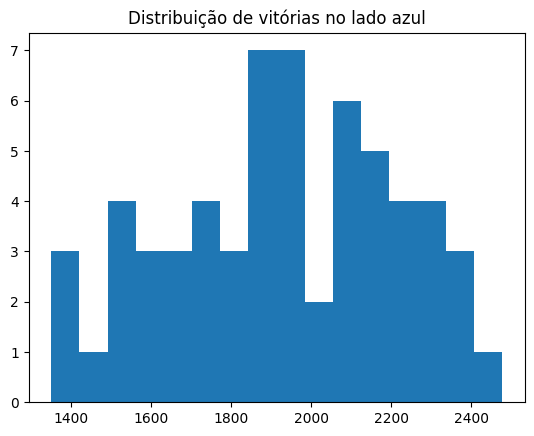

<function matplotlib.pyplot.show(close=None, block=None)>

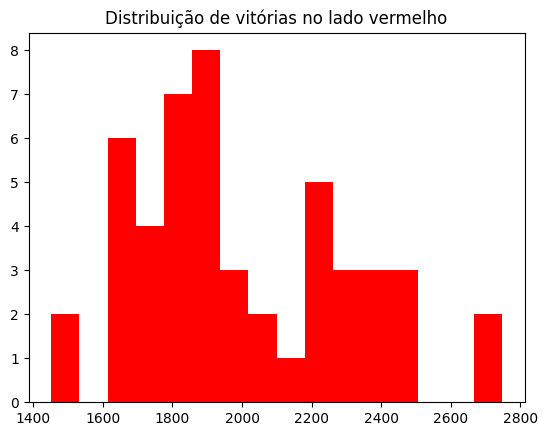

In [248]:
import matplotlib.pyplot as plt
plt.hist(pos_jogo2[pos_jogo2.result==1].groupby('teamblueid').gamelength.head(),bins=(max(pos_jogo2.gamelength)//100 - min(pos_jogo2.gamelength)//100))
plt.title('Distribuição de vitórias no lado azul')
plt.show()
plt.hist(pos_jogo2[pos_jogo2.result==0].groupby('teamredid').gamelength.head(),bins=(max(pos_jogo2.gamelength)//100 - min(pos_jogo2.gamelength)//100),color='red')
plt.title('Distribuição de vitórias no lado vermelho')
plt.show

In [298]:
tempo = pos_jogo2[pos_jogo2.result==1].groupby('teamblueid').gamelength.head().mean()
sec = round(int(tempo%100/100*60))
if sec in range(7):
    sec = '0'+str(sec)
print(f'O tempo médio de vitória no lado azul é: {int(tempo//100)}:{sec}')

O tempo médio de vitória no lado azul é: 19:18


In [297]:
tempo = pos_jogo2[pos_jogo2.result==0].groupby('teamredid').gamelength.head().mean()
sec = round(int(tempo%100/100*60))
if sec in range(7):
    sec = '0'+str(sec)
print(f'O tempo médio de vitória no lado vermelho é: {int(tempo//100)}:{sec}')

O tempo médio de vitória no lado vermelho é: 20:00
